In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [295]:
test_results = pd.read_csv("../data/metrics/proposed-sample.csv")
training_locations = pd.read_csv("../data/latlongs/training_plots.csv")
testing_locations = pd.read_csv("../data/latlongs/test_plots.csv")
test_results.drop('Unnamed: 0', axis = 1, inplace = True)

In [296]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km

def calc_distance(test_idx):
    lat1 = radians(testing_locations['lats'][test_idx])
    lon1 = radians(testing_locations['longs'][test_idx])
    
    distances = []
    for train_idx in range(0, len(training_locations)):
        lat2 = radians(training_locations['lats'][train_idx])
        lon2 = radians(training_locations['longs'][train_idx])
        R = 6373.0

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        distances.append(distance)
    min_distance = np.min(distances)
    dist_50 = int(np.percentile(distances, (50 / 4231)))
    print(f"The min distance is: {int(min_distance)}")
    return min_distance, dist_50

In [297]:
mins = []
fifties = []
for i in range(0, len(testing_locations)):
    d_min, d_50 = calc_distance(i)
    mins.append(d_min)
    fifties.append(d_50)

The min distance is: 163
The min distance is: 104
The min distance is: 59
The min distance is: 108
The min distance is: 22
The min distance is: 15
The min distance is: 78
The min distance is: 18
The min distance is: 92
The min distance is: 41
The min distance is: 15
The min distance is: 227
The min distance is: 195
The min distance is: 242
The min distance is: 182
The min distance is: 51
The min distance is: 14
The min distance is: 72
The min distance is: 18
The min distance is: 22
The min distance is: 50
The min distance is: 151
The min distance is: 163
The min distance is: 43
The min distance is: 26
The min distance is: 27
The min distance is: 19
The min distance is: 14
The min distance is: 152
The min distance is: 90
The min distance is: 79
The min distance is: 33
The min distance is: 98
The min distance is: 31
The min distance is: 1
The min distance is: 150
The min distance is: 20
The min distance is: 3
The min distance is: 53
The min distance is: 48
The min distance is: 70
The min

The min distance is: 46
The min distance is: 171
The min distance is: 55
The min distance is: 32
The min distance is: 7
The min distance is: 32
The min distance is: 31
The min distance is: 18
The min distance is: 37
The min distance is: 36
The min distance is: 136
The min distance is: 36
The min distance is: 47
The min distance is: 68
The min distance is: 9
The min distance is: 126
The min distance is: 178
The min distance is: 51
The min distance is: 28
The min distance is: 13
The min distance is: 60
The min distance is: 16
The min distance is: 24
The min distance is: 86
The min distance is: 39
The min distance is: 76
The min distance is: 67
The min distance is: 2
The min distance is: 6
The min distance is: 16
The min distance is: 11
The min distance is: 38
The min distance is: 38
The min distance is: 21
The min distance is: 20
The min distance is: 33
The min distance is: 88
The min distance is: 26
The min distance is: 78
The min distance is: 35
The min distance is: 16
The min distance

The min distance is: 21
The min distance is: 76
The min distance is: 58
The min distance is: 130
The min distance is: 70
The min distance is: 69
The min distance is: 27
The min distance is: 150
The min distance is: 931
The min distance is: 206
The min distance is: 679
The min distance is: 1238
The min distance is: 102
The min distance is: 251
The min distance is: 440
The min distance is: 323
The min distance is: 1533
The min distance is: 154
The min distance is: 1620
The min distance is: 288
The min distance is: 944
The min distance is: 198
The min distance is: 71
The min distance is: 397
The min distance is: 82
The min distance is: 64
The min distance is: 60
The min distance is: 79
The min distance is: 51
The min distance is: 27
The min distance is: 1301
The min distance is: 135
The min distance is: 235
The min distance is: 425
The min distance is: 177
The min distance is: 300
The min distance is: 896
The min distance is: 75
The min distance is: 133
The min distance is: 75
The min dis

The min distance is: 164
The min distance is: 122
The min distance is: 95
The min distance is: 399
The min distance is: 125
The min distance is: 435
The min distance is: 42
The min distance is: 190
The min distance is: 246
The min distance is: 147
The min distance is: 283
The min distance is: 513
The min distance is: 222
The min distance is: 56
The min distance is: 478
The min distance is: 294
The min distance is: 156
The min distance is: 196
The min distance is: 54
The min distance is: 270
The min distance is: 389
The min distance is: 359
The min distance is: 331
The min distance is: 64
The min distance is: 272
The min distance is: 144
The min distance is: 554
The min distance is: 276
The min distance is: 530
The min distance is: 184
The min distance is: 389
The min distance is: 757
The min distance is: 369
The min distance is: 129
The min distance is: 74
The min distance is: 54
The min distance is: 327
The min distance is: 134
The min distance is: 842
The min distance is: 1017
The mi

In [298]:
testing_locations['min_d'] = mins
testing_locations['50_d'] = fifties

In [299]:
testing_locations.to_csv("../data/latlongs/test_plots.csv")

In [300]:
testing = testing_locations.join(test_results, how = 'inner')

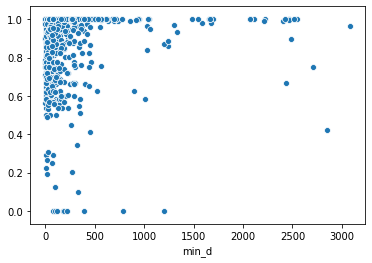

In [301]:
precision = testing['tp_soft'] / (testing['tp_soft'] + testing['fp_soft'])
recall = testing['tp_soft'] / (testing['tp_soft'] + testing['fn_soft'])
f1_soft = (precision + recall) / 2
sns.scatterplot(testing['min_d'], f1_soft)

In [705]:
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h

precision = testing['tp_soft'] / (testing['tp_soft'] + testing['fp_soft'])
recall = testing['tp_soft'] / (testing['tp_soft'] + testing['fn_soft'])
f1s = 2 * ((precision * recall) / (precision + recall))

min_distances = [x for x in range(10, 500, 10)]
group = [[0, 10], [20, 30], [40, 50], [60, 70, 80, 90]]
matrix = np.empty((len(min_distances), len(min_distances)))
std = np.empty((len(min_distances), len(min_distances)))
sizes = np.empty((len(min_distances), len(min_distances)))

for idx, dist in enumerate(min_distances):
    for idy, g in enumerate(group):
        #locs = (testing['min_d'] > dist)
        locs = np.logical_and( ((testing['min_d'] > (dist)) &
                                (testing['min_d'] < (1500))), [x in g for x in testing['group']])
        #if sum(locs) < 10:
        #    print(f"ERROR less than 10 at {dist}")
        #precision = np.sum(testing['tp_soft'][locs]) / np.sum((testing['tp_soft'][locs] + testing['fp_soft'][locs]))
        #recall = np.sum(testing['tp_soft'][locs]) / np.sum((testing['tp_soft'][locs] + testing['fn_soft'][locs]))
        #f1_soft = 2 * ((precision * recall) / (precision + recall))
        #f1_subsample = f1s[locs]
        #f1_subsample = f1_subsample[~np.isnan(f1_subsample)]
        #f1_baseline = f1s[np.logical_and([x in g for x in testing['group']],
        #                             testing['min_d'] < dist)]
        #f1_baseline = f1_baseline[~np.isnan(f1_baseline)]
        
        #se = mean_confidence_interval(f1_subsample)
        #se = np.std(f1_subsample) / np.sqrt(len(f1_subsample))
        #if idy == 0:
        #    print(np.mean(f1_baseline) - se, np.mean(f1_subsample) + se)
        #if idy == 0:
        #    print(dist, scipy.stats.mannwhitneyu(f1_baseline, f1_subsample))
        #print(f"At a minimum distance of {dist}, {g}, f1 is {np.mean(f1_soft)} for {sum(locs)}")
        mean_f1 = np.mean(f1s[locs])
        if mean_f1 > 1:
            mean_f1 = 1
        matrix[idx, idy] = mean_f1
        std[idx, idy] = se
        sizes[idx, idy] = sum(locs)

In [696]:
from scipy import stats
stats.pearsonr(matrix[:, 0], [x for x in range(0, 39, 1)])[0]# ** 2

-0.7623985485153129

In [706]:
matrix[:6, 0] = matrix[:6, 0] - 0.05

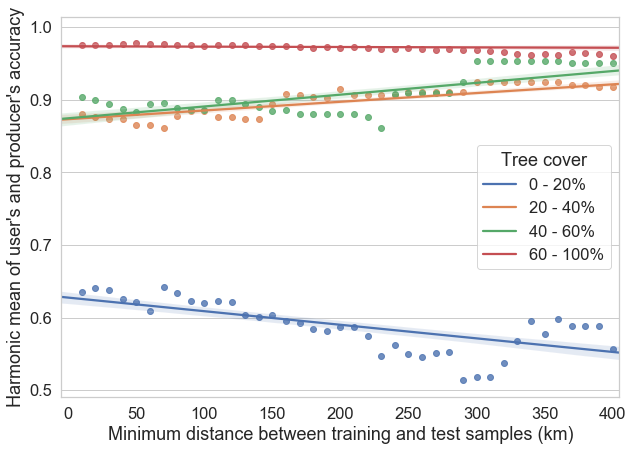

<Figure size 432x288 with 0 Axes>

In [708]:
plt.figure(figsize=(10, 7))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
ax1 = sns.regplot(min_distances, matrix[:, 0])
#sns.pointplot(231, 0.62)
#ax1.fill_between(min_distances, matrix[:, 0] - std[:, 0], matrix[:, 0] + std[:, 0], alpha = 0.3)

ax2 = sns.regplot(min_distances, matrix[:, 1])
#ax2 = sns.lineplot(min_distances, matrix[:, 1])
#ax2.fill_between(min_distances, matrix[:, 1] - std[:, 1], matrix[:, 1] + std[:, 1], alpha = 0.3)

#ax3 = sns.lineplot(min_distances, matrix[:, 2])
ax3 = sns.regplot(min_distances, matrix[:, 2])
ax3 = sns.regplot(min_distances, matrix[:, 3])
#ax3.fill_between(min_distances, matrix[:, 2] - std[:, 2], matrix[:, 2] + std[:, 2], alpha = 0.2)
plt.legend(labels=['0 - 20%', '20 - 40%', '40 - 60%', '60 - 100%'], title = 'Tree cover')
plt.xlabel("Minimum distance between training and test samples (km)")
plt.ylabel("Harmonic mean of user's and producer's accuracy")
#ax2.set_xticks((0, 25, 75, 125, 175, 225, 275, 325, 375, 425, 475))
ax2.xaxis.grid(False)
ax2.set(xlim = (-5, 405))
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('../references/pdf/spatial-correlation.pdf')





#sns.lineplot(min_distances, matrix[:, 3])
#sns.lineplot(min_distances, matrix[:, 4])

In [694]:
np.percentile(mins, 95)

1005.6196331013086

In [426]:
locs = (testing['min_d'] > 6)
f1s_50 = f1s[locs]
f1s_50 = f1s_50[~np.isnan(f1s_50)]
f1s_all = f1s[~locs]
f1s_all = f1s_all[~np.isnan(f1s_all)]

scipy.stats.mannwhitneyu(f1s_50, f1s_all, alternative = 'two-sided')

MannwhitneyuResult(statistic=22251.0, pvalue=0.0036494247107721495)

In [454]:
f1, min_distance, n_tp

224.7470789185429

In [414]:
np.mean(f1s_50)

0.8902331516475612

In [415]:
len(f1s_all)

639

In [416]:
len(f1s_50)

116